In [ ]:
knitr::opts_chunk$set(echo = TRUE)



# Install

In [ ]:
install.packages(c("tidytext", "SnowballC", "rmarkdown", "scales", "udpipe", "vecsets"))

In [ ]:
# devtools::install_github("quanteda/readtext")

# 0. Packages



In [ ]:
library(tidyverse)
library(tidytext)
library(SnowballC)
# library(readtext)
library(rmarkdown)
library(scales)
library(udpipe)
library(vecsets)


# 1. Dateien einlesen



In [ ]:
github = "https://raw.githubusercontent.com/tpetric7/tpetric7.github.io/main/data/books/"
# novels_txt = readtext(paste0(github, "*.txt"), docvarsfrom = "filenames", encoding = "UTF-8") %>% 
#  rename(title = docvar1)
# novels_txt
# novels = as.data.frame(novels_txt)


In [24]:
github = "https://raw.githubusercontent.com/tpetric7/tpetric7.github.io/main/data/books/"
prozess = read_lines(paste0(github, "prozess.txt"))
tom = read_lines(paste0(github, "tom.txt"))

Wir wandeln die Datei in eine Tabelle um.



In [27]:
prozess = as_tibble(prozess) %>% rename(text = value) %>% mutate(doc_id = "prozess")
tom = as_tibble(tom) %>% rename(text = value) %>% mutate(doc_id = "tom")
novels = rbind(prozess, tom)

In [28]:
str(novels)

tibble [2 × 2] (S3: tbl_df/tbl/data.frame)
 $ text  : chr [1:2] "Der Prozess by Franz Kafka Aligned by : bilingual-texts.com ( fully reviewed )   Der Prozess      Franz Kafka  "| __truncated__ "Tom Sawyer by Mark Twain Aligned by : András Farkas ( autoalignment )   Source : Project Gutenberg      Die Abe"| __truncated__
 $ doc_id: chr [1:2] "prozess" "tom"


# 2. Lemmatisierung

Unser Ziel ist die Extrahierung von Wortbildungsmorphemen. Daher führen wir mit dem Program *udpipe* zuerst eine Analyse der Wortformen durch, die auch eine Lemmatisierung der Wortformen einschließt. Durch die Lemmatisierung können wir auf die Grundformen von Wörtern zurückgreifen und Flexionsmorpheme ausschließen.


In [ ]:
library(udpipe)
model = udpipe_download_model(language = "german")
demodel = udpipe_load_model(model$file_model)


Die Annotation der Wortformen kann mehrere Minuten dauern, falls es sich um längere Texte handelt.



In [29]:
# x = udpipe_annotate(demodel, novels_txt$text, trace = TRUE)
x = udpipe_annotate(demodel, novels$text, trace = TRUE)
x = as.data.frame(x)


2021-08-06 09:11:12 Annotating text fragment 1/2
2021-08-06 09:13:57 Annotating text fragment 2/2


Wir filtern Interpunktionszeichen heraus, die für unser Ziel nicht relevant sind. Die Spalte "upos" enthält die dafür relevante Kategorie ("PUNCT").

In einem weiteren Schritt fügen wir mit *mutate* eine neue Spalte ("word") hinzu, welche die tokens der Texte enthält, aber kleingeschrieben gewerden sollen, was mit *tolower()* erreicht werden kann.


In [30]:
udpipe = x %>% 
  filter(upos != "PUNCT") %>% 
  mutate(word = tolower(token))


Für die Entfernung von Ziffern und Symbolen aus der Tabelle verwenden wir einen regulären Ausdruck (regex). Außerdem sollen alle Lemmas mit Kleinbuchstaben beginnen.



In [31]:
novels_words = udpipe %>% 
  filter(str_detect(lemma, "[:alpha:]")) %>% # keine Ziffern oder Interpunktionszeichen oder Symbole
  mutate(lemma = tolower(lemma))


Da wir vor allem an Wörtern interessiert sind, die aus mehr als einem Morphem bestehen, filtern wir u.a. Funktionswörter heraus, und zwar mit der Funktion *anti_join()* und einer Stoppwortliste aus dem Programm *stopwords*. 

Da die Stoppwortliste im Format einer Liste vorliegt, müssen wir sie in eine Tabelle umwandeln, und zwar mit der Funktion *as_tibble()*. Der Name der Tabellenspalte muss mit dem Namen der entsprechende Spalte in "novels_words" (also: "word") übereinstimmen, damit wir die beiden Tabellen entsprechend vereinen können. Den Namen von Tabellenspalten verändern wir mit *rename()*.

Außerdem wollen wir gleichzeitig auch einige Wörter herausfiltern, die nicht zu den Romantexten gehören: englische Wörter, die Namen der Autoren, eventuell noch nicht entfernte Ziffern, Interpunktionszeichen und Symbole. Zur Vereinigung der Wortformen in einen Vektor bzw. Tabellenspalte verwenden wir die concatenate-Funktion *c()*.

In einem weiteren Schritt sollen die Kategorien der "doc_id" bessere Namen erhalten: die allgemeineren Namen "doc1" und "doc2" ersetzen wir mit den eindeutigeren Namen "prozess" und "tom".


In [ ]:
install.packages("stopwords")

In [35]:
install.packages("kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’




In [39]:
library(kableExtra)
stoplist_de = c(stopwords::stopwords(language = "german"), "franz","kafka","mark","twain",
                "by","aligned","Aligned","","bilingual-texts.com","fully","reviewed") %>% 
  as_tibble() %>% 
  rename(word = value)

novels_words = novels_words %>% 
  mutate(doc_id = str_replace(doc_id, "doc1", "prozess"),
         doc_id = str_replace(doc_id, "doc2", "tom")) %>% 
  anti_join(stoplist_de, novels_words, by = "word") # möglichst keine Funktionswörter
head(novels_words, 10) %>% paged_table()
tail(novels_words, 10) %>% paged_table()


doc_id  paragraph_id sentence_id
1  prozess 1            1          
2  prozess 1            1          
3  prozess 1            1          
4  prozess 1            1          
5  prozess 1            1          
6  prozess 1            1          
7  prozess 1            1          
8  prozess 1            1          
9  prozess 1            1          
10 prozess 1            1          
   sentence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  Der Prozess by Franz Kafka Aligned by : bilingual-texts.com ( fully reviewed ) Der Prozess Franz Kafka 1 Verhaftung , Gespräch mit Frau Grubach , dann Fräulein Brüstner Jemand mußte Josef K. verleumdet haben , denn ohne daß er etwas Böses getan hätte , wurde er eines Morgens verhaftet . Die Köchin der Frau Grubach , seiner Zimmervermieterin , die ihm jeden Tag gegen acht Uhr früh das Frühstück brachte , kam diesmal nicht . Das war noch niemals geschehen . K. wartete noch ein Weilchen , sah von seinem Kopfkissen aus die alte Frau , die ihm gegenüber wohnte und die ihn mit einer an ihr ganz ungewöhnlichen Neugierde beobachtete , dann aber , gleichzeitig befremdet und hungrig , läutete er . Sofort klopfte es und ein Mann , den er in dieser Wohnung noch niemals gesehen hatte , trat ein . Er war schlank und doch fest gebaut , er trug ein anliegendes schwarzes Kleid , das , ähnlich den Reiseanzügen , mit verschiedenen Falten , Taschen , Schnallen , Knöpfen und einem Gürtel versehen war und infolgedessen , ohne daß man sich darüber klar wurde , wozu es dienen sollte , besonders praktisch erschien . » Wer sind Sie ? « fragte K. und saß gleich halb aufrecht im Bett . Der Mann aber ging über die Frage hinweg , als müsse man seine Erscheinung hinnehmen , und sagte bloß seinerseits : » Sie haben geläutet ? « » Anna soll mir das Frühstück bringen « , sagte K. und versuchte , zunächst stillschweigend , durch Aufmerksamkeit und Überlegung festzustell

doc_id paragraph_id sentence_id
67723 tom    1            293        
67724 tom    1            293        
67725 tom    1            293        
67726 tom    1            293        
67727 tom    1            293        
67728 tom    1            293        
67729 tom    1            293        
67730 tom    1            293        
67731 tom    1            293        
67732 tom    1            293        
      sentence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
67723 ohne die eines Mannes zu werden . Wenn jemand eine Erzählung über erwachsene Leute schreibt , weiß er genau , wo er aufzuhören hat -- bei der Heirat ; schreibt er aber über ein unreifes Kind , so muß er aufhören , wo er's für passend hält . Die meisten der in diesem Buch vorkommenden Personen leben noch , sind glücklich und mehren sich . Vielleicht erscheint es eines Tages als angebracht , die Geschichte der Jugend wieder aufzunehmen und zu sehen , was für Männer und Frauen aus ihnen geworden sind ; darum wird's am besten sein , von ihrem jetzigen Leben hier nichts mehr zu verraten .
67724 ohne die eines Mannes zu werden . Wenn jemand eine Erzählung über erwachsene Leute schreibt , weiß er genau , wo er aufzuhören hat -- bei der Heirat ; schreibt er aber über ein unreifes Kind , so muß er aufhören , wo er's für passend hält . Die meisten der in diesem Buch vorkommenden Personen leben noch , sind glücklich und mehren sich . Vielleicht erscheint es eines Tages als angebracht , die Geschichte der Jugend wieder aufzunehmen und zu sehen , was für Männer und Frauen aus ihnen geworden sind ; darum wird's am besten sein , von ihrem jetzigen Leben hier nichts mehr zu verraten .
67725 ohne die eines Mannes zu werden . Wenn jemand eine Erzählung über erwachsene Leute schreibt , weiß er genau , wo er aufzuhören hat -- bei der Heirat ; schreibt er aber über ein unreifes Kind , so muß er aufhören , wo er's für passend hält . Die meisten der in diesem Buch vorkommenden Personen leben noch , sind glücklich und mehren sich . Vielleicht erscheint es eines Tages als angebracht , die Geschichte der Jugend wieder aufzunehmen und zu sehen , was für Männer und Frauen aus ihnen geworden sind ; darum wird's am besten sein , von ihrem jetzigen Leben hier nichts mehr zu verraten .
67726 ohne die eines Mannes zu werden . Wenn jemand eine Erzählung über erwachsene Leute schreibt , weiß er genau , wo er aufzuhören hat -- bei der Heirat ; schreibt er aber über ein unreifes Kind , so muß er aufhören , wo er's für passend hält . Die meisten der in diesem Buch vorkommenden Personen leben noch , sind glücklich und mehren sich . Vielleicht erscheint es eines Tages als angebracht , die Geschichte der Jugend wieder aufzunehmen und zu sehen , was für Männer und Frauen aus ihnen geworden sind ; darum wird's am besten sein , von ihrem jetzigen Leben hier nichts mehr zu verraten .
67727 ohne die eines Mannes zu werden . Wenn jemand eine Erzählung über erwachsene Leute schreibt , weiß er genau , wo er aufzuhören hat -- bei der Heirat ; schreibt er aber über ein unreifes Kind , so muß er aufhören , wo er's für passend hält . Die meisten der in diesem Buch vorkommenden Personen leben noch , sind glücklich und mehren sich . Vielleicht erscheint es eines Tages als angebracht , die Geschichte der Jugend wieder aufzunehmen und zu sehen , was für Männer und Frauen aus ihnen geworden sind ; darum wird's am besten sein , von ihrem jetzigen Leben hier nichts mehr zu verraten .
67728 

# 3. Stemming

Beim Stemming werden die Stämme von Wortformen extrahiert. In flexionsarmen Sprachen (z.B. Englisch) sind die Ergebnisse gewöhnlich nützlicher als in morphologisch reichen Sprachen (z.B. Deutsch, Slowenisch).

Hier verwenden wir die Stemming-Funktion *wordStem()* des Programms *SnowballC*, um potentielle Suffixe und Suffixoide komplexer Wörter zu extrahieren. Das Ziel ist eine morphologische Vergleichsanalyse, und zwar von Wortbildungsmorphemen in den Romaen.

Mit *mutate()* und der *wordStem()*-Funktion fügen wir der Tabelle eine weitere Spalte hinzu, der wir den Namen "stamm" geben. 


In [40]:
novels_words = novels_words %>% 
  mutate(stamm = wordStem(lemma, language = "de"))
head(novels_words) %>% paged_table()


doc_id  paragraph_id sentence_id
1 prozess 1            1          
2 prozess 1            1          
3 prozess 1            1          
4 prozess 1            1          
5 prozess 1            1          
6 prozess 1            1          
  sentence                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 Der Prozess by Franz Kafka Aligned by : bilingual-texts.com ( fully reviewed ) Der Prozess Franz Kafka 1 Verhaftung , Gespräch mit Frau Grubach , dann Fräulein Brüstner Jemand mußte Josef K. verleumdet haben , denn ohne daß er etwas Böses getan hätte , wurde er eines Morgens verhaftet . Die Köchin der Frau Grubach , seiner Zimmervermieterin , die ihm jeden Tag gegen acht Uhr früh das Frühstück brachte , kam diesmal nicht . Das war noch niemals geschehen . K. wartete noch ein Weilchen , sah von seinem Kopfkissen aus die alte Frau , die ihm gegenüber wohnte und die ihn mit einer an ihr ganz ungewöhnlichen Neugierde beobachtete , dann aber , gleichzeitig befremdet und hungrig , läutete er . Sofort klopfte es und ein Mann , den er in dieser Wohnung noch niemals gesehen hatte , trat ein . Er war schlank und doch fest gebaut , er trug ein anliegendes schwarzes Kleid , das , ähnlich den Reiseanzügen , mit verschiedenen Falten , Taschen , Schnallen , Knöpfen und einem Gürtel versehen war und infolgedessen , ohne daß man sich darüber klar wurde , wozu es dienen sollte , besonders praktisch erschien . » Wer sind Sie ? « fragte K. und saß gleich halb aufrecht im Bett . Der Mann aber ging über die Frage hinweg , als müsse man seine Erscheinung hinnehmen , und sagte bloß seinerseits : » Sie haben geläutet ? « » Anna soll mir das Frühstück bringen « , sagte K. und versuchte , zunächst stillschweigend , durch Aufmerksamkeit und Überlegung festzustellen , wer der Mann eigentlich war . Aber dieser setzte sich nicht allzulange seinen Blicken aus , sondern wandte sich zur Tür , die er ein wenig öffnete 

Nun stehen uns die Lemma- und Stammformen zur Verfügung. Der Unterschied zwischen den jeweiligen Formen sollte (meist) Wortbildungsmorpheme (Suffixe) ergeben.

Um Unterschiede zwischen den in den Spalten "lemma" und "stamm" gespeicherten Wortformen zu bestimmen, wollen wir ein spezielles Programm verwenden: *library(vectsets)*.

Dann folgen einige Korrekturen mit *str_remove()*, *str_remove_all()*, *str_replace()* und *str_replace_all()*, damit in der Spalte "diffs" möglichst nur Wortbildungssuffixe vorkommen.

Mit *str_remove()* beseitigen wir ein Zeichen einmal, mit *str_remove_all()* so oft, wie es in einer Tabellenspalte vorkommt.
Mit *str_replace()* wandeln wir ein Zeichen einmal in ein anderes um, mit *str_replace_all()* so oft, wie es in einer Tabellenspalte vorkommt.


In [41]:
library(vecsets)
novels_full_words = novels_words %>% 
  mutate(diffs = as.character(mapply(vsetdiff, strsplit(lemma, split = ""),
                            strsplit(stamm, split = "")))) %>% 
  mutate(diffs = str_remove(diffs, "c\\("),
         diffs = str_remove(diffs, "\\)"),
         diffs = str_remove_all(diffs, '\\"'),
         diffs = str_remove_all(diffs, ", "), 
         diffs = str_replace(diffs, "character\\(0", ""),
         diffs = str_replace(diffs, "ß", ""),
         diffs = str_replace_all(diffs, "ä", ""),
         diffs = str_replace_all(diffs, "ö", ""),
         diffs = str_replace_all(diffs, "ü", ""))


Das Ergebnis ist nicht perfekt, aber für bestimmte Wortbildungssuffixe brauchbar.



In [42]:
novels_full_words %>% 
  select(doc_id, lemma, stamm, diffs) %>% 
head(10) %>% paged_table()


doc_id  lemma      stamm    diffs
1  prozess prozeß     prozess       
2  prozess prozeß     prozess       
3  prozess verhaftung verhaft  ung  
4  prozess gespräch   gesprach      
5  prozess frau       frau          
6  prozess grubach    grubach       
7  prozess fräulein   fraulein      
8  prozess brüstner   brustn   er   
9  prozess jemand     jemand        
10 prozess müssen     muss     en

Wir speichern die Tabelle für spätere Analysen. Möglich sind verschiedene Formate, z.B. "rds"-Dateien, die man mit R/Rstudio öffnen kann, und "csv"-Dateien, die man mit beliebigen Programmen öffnen kann. 
Aber wir speichern die Tabelle hier nur als Excel-Datei ab, weil die Tabellenzeilen nicht zu lang sind.


In [ ]:
# write_rds(novels_full_words, "data/novels_full_words.rds")
# write_csv(novels_full_words, "data/novels_full_words.csv")
# writexl::write_xlsx(novels_full_words, "data/novels_full_words.xlsx")


# 4. Wortbildungsanalyse

Um am nächsten Tag nicht alle vorherigen Schritte noch einmal machen zu müssen, können wir an dieser Stelle die zuvor gespeicherte Tabelle öffnen.


In [ ]:
# novels_full_words = readxl::read_xlsx("data/novels_full_words.xlsx")



Wir beginnen unsere Wortbildungsanalyse mit dem Abzählen von verschiedenen Endungen, die von unserem Programm identifiziert wurden.

Wir wählen mit *select()* nur ein paar Tabellenspalten aus, damit wir die Übersicht behalten.
Die Ergebnisse sollen nach dem Romantitel gruppiert werden, was man mit *group_by()* bewerkstelligt.
Mit *filter()* werden leere Zeilen in der Tabellenspalte "diffs" herausgefiltert.
Dann zählen wir die verschiedenen Kategorien in der Tabellenspalte, und zwar mit *count()*.
Zuletzt verändern wir mit *pivot_wider()* das Tabellenformat, so dass die Romantitel als Spaltennamen erscheinen und die Endungen als Tabellenzeilen. Die Spalten "prozess" und "tom" enthalten nun die Häufigkeitswerte für die einzelnen Endungen.


In [44]:
novels_full_words %>% 
  select(doc_id, lemma, stamm, diffs) %>%
  group_by(doc_id) %>% 
  filter(diffs != "") %>%
  count(diffs) %>% 
  pivot_wider(names_from = doc_id, values_from = n) %>% 
  paged_table()


diffs    prozess tom 
1  e         2047   2587
2  em         108     36
3  en       10570   9914
4  end        157    184
5  ende         9     10
6  endem        1     NA
7  enden       12      8
8  ender        3     NA
9  ends         2     NA
10 ene          8     22
11 enen         9      8
12 ener        72      5
13 enheit      78     60
14 ens        109     48
15 er        1736   1656
16 ere         24     16
17 eren       110    196
18 erer         3      1
19 erheit       5      6
20 erlich      34     22
21 ern        195    187
22 ers         72     29
23 es          45     61
24 est         20     40
25 heit        29     25
26 ig         423    279
27 ige         13     16
28 igem         3      6
29 igen       140     47
30 igend       19     13
⋮  ⋮        ⋮       ⋮   
48 se         1       2 
49 ßig        2      NA 
50 st       106     152 
51 ste        3       1 
52 stem       1      NA 
53 sten       1      NA 
54 ster       7      10 
55 ung      516     304 
56 ungen      1      NA 
57 endern    NA       2 
58 enheiten  NA       1 
59 eres      NA       2 
60 este      NA       1 
61 esten     NA       1 
62 ester     NA       1 
63 et        NA       1 
64 heiten    NA       1 
65 heits     NA       1 
66 igere     NA       1 
67 igt       NA       4 
68 ische     NA       1 
69 ischem    NA       1 
70 liche     NA       2 
71 licher    NA       1 
72 lichter   NA       1 
73 ße        NA       1 
74 t         NA       1 
75 unge      NA       1 
76 ungeren   NA       1 
77 ungs      NA       1

Wir erweitern unsere Häufigkeitstabelle mit Prozentzahlen und geben ihr einen Namen ("novels_diffs").



In [45]:
novels_diffs = novels_full_words %>% 
  select(doc_id, lemma, stamm, diffs) %>%
  group_by(doc_id) %>% 
  filter(diffs != "") %>%
  count(diffs) %>% 
  pivot_wider(names_from = doc_id, values_from = n) %>% 
  mutate(prozess_total = sum(prozess, na.rm = TRUE),
         tom_total = sum(tom, na.rm = TRUE)) %>% 
  mutate(prozess_pct = prozess/prozess_total,
         tom_pct = tom/tom_total,) %>% 
  select(-prozess_total, -tom_total)

head(novels_diffs) %>% paged_table()


diffs prozess tom  prozess_pct  tom_pct     
1 e      2047   2587 1.150646e-01 0.1541808213
2 em      108     36 6.070826e-03 0.0021455391
3 en    10570   9914 5.941540e-01 0.5908576196
4 end     157    184 8.825183e-03 0.0109660886
5 ende      9     10 5.059022e-04 0.0005959831
6 endem     1     NA 5.621135e-05           NA

Noch eine graphische Darstellung der Häufigkeitswerte, für die wir die Tabelle umformen, und zwar mit *pivot_longer()* und verkürzen (durch Filtervorgänge): wir wollen nur Endungen mit einer Häufigkeit von mehr als 0,5% (0.005) beibehalten. Mit *fct_lump()* kann man die Anzahl der Kategorien reduzieren (die Restkategorie heißt hier "Other"). Mit *fct_reorder()* sorgen wir dafür, dass die häufigeren Endungen im Diagramm oben erscheinen. Die Funktion *facet_wrap()* ermöglicht die getrennte Darstellung der Romane.



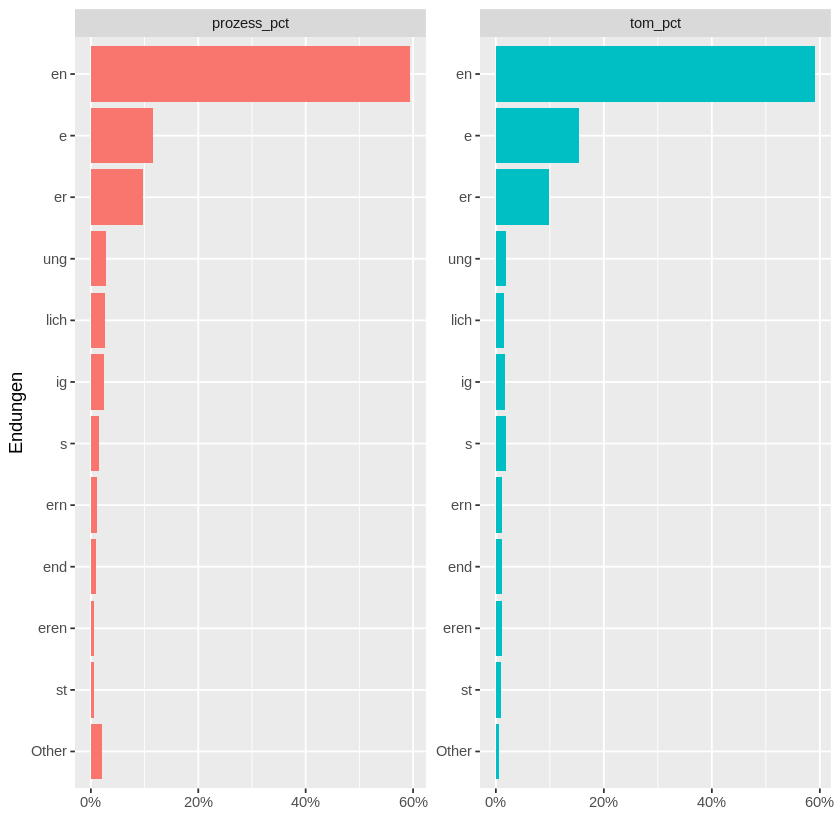

In [46]:
library(scales)

novels_diffs %>% 
  pivot_longer(cols = prozess_pct:tom_pct, names_to = "title", values_to = "prozent") %>% 
  filter(!is.na(prozent)) %>% 
  filter(prozent > 0.005) %>% 
  mutate(diffs = fct_lump(diffs, 10)) %>% 
  mutate(diffs = fct_reorder(diffs, prozent)) %>% 
  ggplot(aes(prozent, diffs, fill = title)) +
  geom_col() +
  theme(legend.position = "none") +
  scale_x_continuous(labels = percent) +
  labs(x = "", y = "Endungen") +
  facet_wrap(~ title, scales = "free")


Vergleichen wir mal die Häufigkeit der Endung "-lich" in den Romanen! Da dieses Wortbildungssuffix mit adjektivischen Stämmen verknüpft wird, filtern die entsprechende Wortklasse heraus.



In [47]:
(lich_tab = novels_full_words %>% 
  group_by(doc_id) %>% 
  filter(upos == "ADJ") %>% 
  count(diffs == "lich") %>%
  rename(lich = `diffs == "lich"`) %>% 
  filter(!is.na(lich)) %>% 
  pivot_wider(names_from = doc_id, values_from = n)
)


lich  prozess tom 
1 FALSE 4785    5204
2  TRUE  386     213

Ist der Unterschied zwischen den Romanen statistisch signifikant? Das überprüfen wir mit dem Chi-Quadrat-Test. Die erste Spalte enthält keine Zahlen, daher müssen wir sie beim Testen entfernen, und zwar mit *[, -1]*: alle Zeilen übernehmen, aber die este Tabellenspalte nicht.



In [48]:
chisq.test(lich_tab[,-1])




	Pearson's Chi-squared test with Yates' continuity correction

data:  lich_tab[, -1]
X-squared = 61.198, df = 1, p-value = 5.161e-15


Der Chi-Quadrat-Test hat lediglich einen signifikanten Unterschied zwischen den beiden Stichproben "prozess" und "tom" bestätigt, sagt uns aber nicht, in welcher Stichprobe, das Suffix "-lich" verhältnismäßig häufiger vorkommt. Bei dieser Beurteilung helfen uns Prozentzahlen.



In [49]:
lichtab2 = novels_full_words %>% 
  group_by(doc_id) %>% 
  filter(upos == "ADJ") %>% 
  count(diffs == "lich") %>% 
  rename(lich = `diffs == "lich"`) %>% 
  filter(!is.na(lich)) %>% 
  pivot_wider(names_from = doc_id, values_from = n) %>% 
  mutate(prozess_total = sum(prozess, na.rm = TRUE),
         tom_total = sum(tom, na.rm = TRUE)) %>% 
  mutate(prozess_pct = prozess/prozess_total,
         tom_pct = tom/tom_total,) %>% 
  select(-prozess_total, -tom_total)

lichtab2 %>% paged_table()


lich  prozess tom  prozess_pct tom_pct   
1 FALSE 4785    5204 0.92535293  0.96067934
2  TRUE  386     213 0.07464707  0.03932066

Etwa 21,5% der als Adjektiv identifizierten Lemmas im Roman "prozess" enden mit dem Suffix "-lich", im Roman "tom sawyer" sind es etwa 15,2%. Der Unterschied ist auch in der graphischen Darstellung zu sehen.



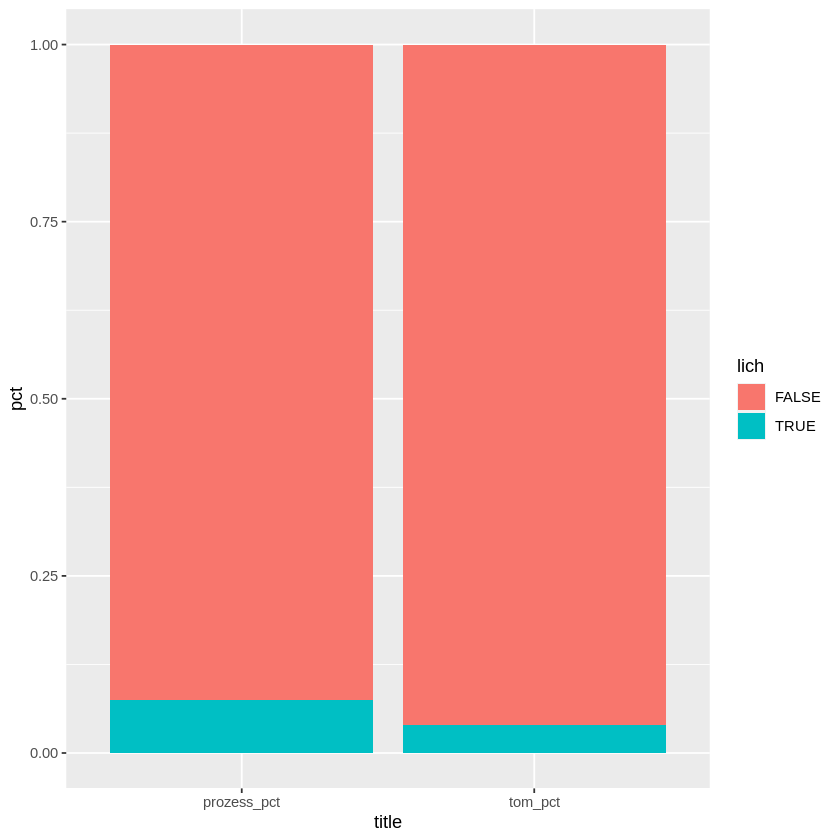

In [50]:
lichtab2 %>% 
  pivot_longer(prozess_pct:tom_pct, names_to = "title", values_to = "pct") %>% 
  ggplot(aes(title, pct, fill = lich)) +
  geom_col()


Das Suffix "-lich" gehört zu den produktiven Wortbildungsmitteln im Deutschen. Warum sind im "prozess" mehr davon zu finden als im anderen Roman? Zur Klärung dieser Frage müssten wir zuerst mehr über die semantischen Eigenschaften und Verknüpfungsmöglichkeiten (oder -einschränkungen) mit verschiedenen Wortstämmen erfahren.



In [51]:
novels_full_words %>% 
  select(doc_id, lemma, word, upos, diffs) %>%
  group_by(doc_id, lemma, word) %>% 
  filter(upos == "ADJ") %>% 
  filter(diffs == "lich") %>% 
  paged_table()


doc_id  lemma              word               upos diffs
1   prozess ungewöhnlich       ungewöhnlichen     ADJ  lich 
2   prozess eigentlich         eigentlich         ADJ  lich 
3   prozess unmöglich          unmöglich          ADJ  lich 
4   prozess freundschaftlich   freundschaftlich   ADJ  lich 
5   prozess zuversichtlich     zuversichtlich     ADJ  lich 
6   prozess freundschaftlich   freundschaftlich   ADJ  lich 
7   prozess natürlich          natürlich          ADJ  lich 
8   prozess unähnlich          unähnlich          ADJ  lich 
9   prozess wahrscheinlich     wahrscheinlich     ADJ  lich 
10  prozess wahrscheinlich     wahrscheinlich     ADJ  lich 
11  prozess unverständlich     unverständlichen   ADJ  lich 
12  prozess begreiflich        begreiflich        ADJ  lich 
13  prozess unvergleichlich    unvergleichlich    ADJ  lich 
14  prozess natürlich          natürliche         ADJ  lich 
15  prozess zuversichtlich     zuversichtlich     ADJ  lich 
16  prozess begreiflich        begreiflich        ADJ  lich 
17  prozess unwahrscheinlich   unwahrscheinlichen ADJ  lich 
18  prozess selbstverständlich selbstverständlich ADJ  lich 
19  prozess natürlich          natürlich          ADJ  lich 
20  prozess nebensächlich      nebensächlich      ADJ  lich 
21  prozess nebensächlich      nebensächlich      ADJ  lich 
22  prozess angeblich          angeblich          ADJ  lich 
23  prozess versöhnlich        versöhnlichen      ADJ  lich 
24  prozess versöhnlich        versöhnlichen      ADJ  lich 
25  prozess tatsächlich        tatsächlich        ADJ  lich 
26  prozess unausstehlich      unausstehlichen    ADJ  lich 
27  prozess ausdrücklich       ausdrücklich       ADJ  lich 
28  prozess absichtlich        absichtlich        ADJ  lich 
29  prozess offensichtlich     offensichtlich     ADJ  lich 
30  prozess unwillkürlich      unwillkürlich      ADJ  lich 
⋮   ⋮       ⋮                  ⋮                  ⋮    ⋮    
570 tom     unmöglich          unmöglich          ADJ  lich 
571 tom     zuversichtlich     zuversichtlich     ADJ  lich 
572 tom     zuversichtlich     zuversichtlich     ADJ  lich 
573 tom     nachdenklich       nachdenklich       ADJ  lich 
574 tom     allmählich         allmählich         ADJ  lich 
575 tom     totenähnlich       totenähnlichem     ADJ  lich 
576 tom     augenscheinlich    augenscheinlich    ADJ  lich 
577 tom     allmählich         allmählich         ADJ  lich 
578 tom     unkenntlich        unkenntlich        ADJ  lich 
579 tom     öffentlich         öffentliche        ADJ  lich 
580 tom     vergeblich         vergebliche        ADJ  lich 
581 tom     natürlich          natürliche         ADJ  lich 
582 tom     unmöglich          unmöglich          ADJ  lich 
583 tom     gewöhnlich         gewöhnlich         ADJ  lich 
584 tom     undenklich         undenkliche        ADJ  lich 
585 tom     gewöhnlich         gewöhnlichen       ADJ  lich 
586 tom     unwillkürlich      unwillkürlich      ADJ  lich 
587 tom     eigentlich         eigentlich         ADJ  lich 
588 tom     befindlich         befindlichen       ADJ  lich 
589 tom     natürlich          natürliche         ADJ  lich 
590 tom     ordentlich         ordentliche        ADJ  lich 
591 tom     ordentlich         ordentlich         ADJ  lich 
592 tom     vermeintlich       vermeintlichen     ADJ  lich 
593 tom     unglaublich        unglaublich        ADJ  lich 
594 tom     gewöhnlich         gewöhnlich         ADJ  lich 
595 tom     wöchentlich        wöchentlich        ADJ  lich 
596 tom     gewöhnlich         gewöhnlicher       ADJ  lich 
597 tom     gemütlich          gemütlich          ADJ  lich 
598 tom     gewöhnlich         gewöhnlich         ADJ  lich 
599 tom     natürlich          natürlich          ADJ  lich

Vergleichen wir die Häufigkeit von mehreren adjektivischen Suffixen in unserem Romankorpus!



In [52]:
novels_full_words %>% 
  select(doc_id, lemma, word, upos, diffs) %>% # Auswahl von hier relevanten Spalten
  group_by(doc_id, lemma, word) %>% # Gruppierung nach diesen Merkmalen (Spalten)
  filter(upos == "ADJ") %>% # Auswahl der Wortklasse
  filter(diffs == "lich" | 
           diffs == "erlich" | 
           diffs == "isch" | 
           diffs == "ig") %>% # Suffixauswahl
  paged_table()


doc_id  lemma            word               upos diffs 
1    prozess ungewöhnlich     ungewöhnlichen     ADJ  lich  
2    prozess gleichzeitig     gleichzeitig       ADJ  ig    
3    prozess eigentlich       eigentlich         ADJ  lich  
4    prozess unmöglich        unmöglich          ADJ  lich  
5    prozess freiwillig       freiwillig         ADJ  ig    
6    prozess freundschaftlich freundschaftlich   ADJ  lich  
7    prozess zuversichtlich   zuversichtlich     ADJ  lich  
8    prozess gleichzeitig     gleichzeitig       ADJ  ig    
9    prozess derartig         derartige          ADJ  ig    
10   prozess freundschaftlich freundschaftlich   ADJ  lich  
11   prozess natürlich        natürlich          ADJ  lich  
12   prozess unähnlich        unähnlich          ADJ  lich  
13   prozess unvorsichtig     unvorsichtig       ADJ  ig    
14   prozess vernünftig       vernünftig         ADJ  ig    
15   prozess geringfügig      geringfügig        ADJ  ig    
16   prozess vorsichtig       vorsichtig         ADJ  ig    
17   prozess wahrscheinlich   wahrscheinlich     ADJ  lich  
18   prozess wahrscheinlich   wahrscheinlich     ADJ  lich  
19   prozess unverständlich   unverständlichen   ADJ  lich  
20   prozess gleichzeitig     gleichzeitig       ADJ  ig    
21   prozess begreiflich      begreiflich        ADJ  lich  
22   prozess ebenbürtig       ebenbürtigen       ADJ  ig    
23   prozess unvergleichlich  unvergleichlich    ADJ  lich  
24   prozess natürlich        natürliche         ADJ  lich  
25   prozess zuversichtlich   zuversichtlich     ADJ  lich  
26   prozess verhältnismäßig  verhältnismäßig    ADJ  ig    
27   prozess begreiflich      begreiflich        ADJ  lich  
28   prozess unwahrscheinlich unwahrscheinlichen ADJ  lich  
29   prozess derartig         derartig           ADJ  ig    
30   prozess militärisch      militärische       ADJ  isch  
⋮    ⋮       ⋮                ⋮                  ⋮    ⋮     
1341 tom     beliebig         beliebigen         ADJ  ig    
1342 tom     großartig        großartig          ADJ  ig    
1343 tom     unwillkürlich    unwillkürlich      ADJ  lich  
1344 tom     eigentlich       eigentlich         ADJ  lich  
1345 tom     befindlich       befindlichen       ADJ  lich  
1346 tom     natürlich        natürliche         ADJ  lich  
1347 tom     vorsichtig       vorsichtig         ADJ  ig    
1348 tom     ordentlich       ordentliche        ADJ  lich  
1349 tom     unschuldig       unschuldig         ADJ  ig    
1350 tom     ordentlich       ordentlich         ADJ  lich  
1351 tom     sorgfältig       sorgfältige        ADJ  ig    
1352 tom     anständig        anständiges        ADJ  ig    
1353 tom     vermeintlich     vermeintlichen     ADJ  lich  
1354 tom     unglaublich      unglaublich        ADJ  lich  
1355 tom     unromantisch     unromantische      ADJ  isch  
1356 tom     biographisch     biographische      ADJ  isch  
1357 tom     gewöhnlich       gewöhnlich         ADJ  lich  
1358 tom     wöchentlich      wöchentlich        ADJ  lich  
1359 tom     gewöhnlich       gewöhnlicher       ADJ  lich  
1360 tom     großmütig        großmütige         ADJ  ig    
1361 tom     großartig        großartig          ADJ  ig    
1362 tom     manierlich       manierlich         ADJ  erlich
1363 tom     achtundvierzig   achtundvierzig     ADJ  ig    
1364 tom     gemütlich        gemütlich          ADJ  lich  
1365 tom     langweilig       langweiligen       ADJ  ig    
1366 tom     regelmäßig       regelmäßig         ADJ  ig    
1367 tom     unanständig      unanständig        ADJ  ig    
1368 tom     gewöhnlich       gewöhnlich         ADJ  lich  
1369 tom     großartig        großartig          ADJ  ig    
1370 tom     natürlich        natürlich          ADJ  lich

Von den insgesamt 1370 als (suffigiertes) Adjektiv identifizierten Wortformen (tokens) kommen 847 im "prozess" und 523 in "tom sawyer" vor. Der Anteil der Zustandsbeschreibungen mit Hilfe von suffigierten Adjektiven scheint im ersten Werk größer zu sein als im zuletzt genannten (was wir aber an dieser Stelle nicht mit einem Chi-Quadrat-Test überprüfen wollen).



In [53]:
adj_tab = novels_full_words %>% 
  select(doc_id, lemma, upos, diffs) %>%
  group_by(doc_id) %>% 
  filter(upos == "ADJ") %>% 
  filter(diffs == "lich" | diffs == "erlich" | diffs == "isch" | diffs == "ig") %>% 
  count(diffs) %>% 
  pivot_wider(names_from = doc_id, values_from = n) %>% 
  mutate(prozess_total = sum(prozess, na.rm = TRUE),
         tom_total = sum(tom, na.rm = TRUE)) %>% 
  mutate(prozess_pct = prozess/prozess_total,
         tom_pct = tom/tom_total)

adj_tab %>% paged_table()


diffs  prozess tom prozess_total tom_total prozess_pct tom_pct   
1 erlich  32      21 847           523       0.03778040  0.04015296
2 ig     395     254 847           523       0.46635183  0.48565966
3 isch    34      35 847           523       0.04014168  0.06692161
4 lich   386     213 847           523       0.45572609  0.40726577

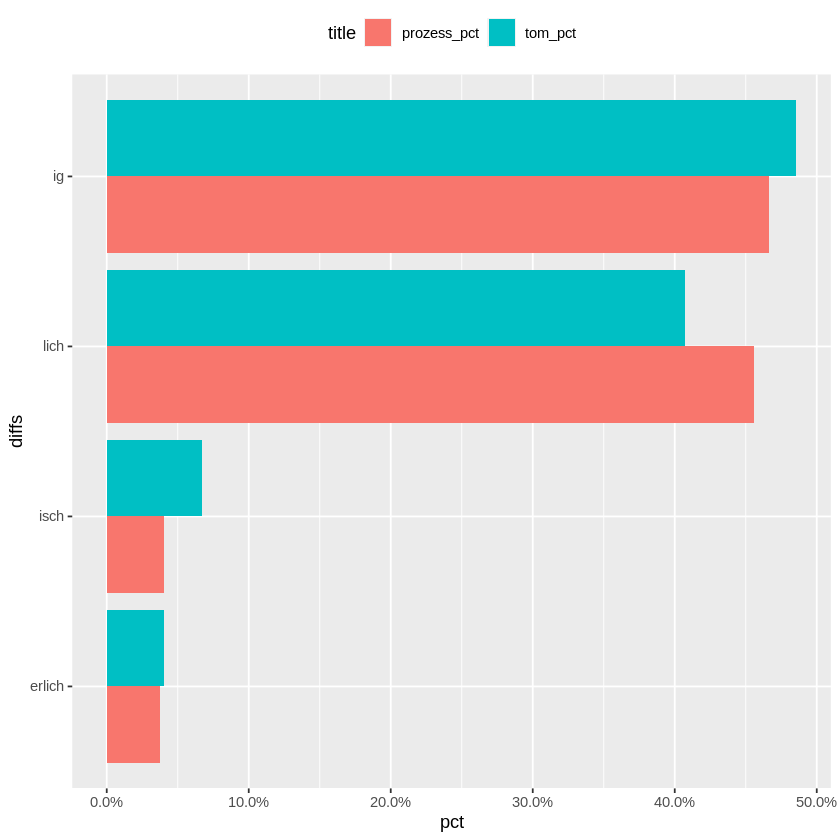

In [54]:
library(scales)

adj_tab %>% 
  pivot_longer(prozess_pct:tom_pct, names_to = "title", values_to = "pct") %>% 
  mutate(diffs = fct_reorder(diffs, pct)) %>% 
  ggplot(aes(pct, diffs, fill = title)) +
  geom_col(position = "dodge") +
  scale_x_continuous(labels = percent) +
  theme(legend.position = "top")


# Nicht verwendete Tabelle



In [ ]:
novels_full_words %>% 
  select(doc_id, lemma, stamm, diffs) %>%
  group_by(doc_id) %>% 
  filter(diffs != "") %>%
  add_count(doc_id, name = "total") %>% 
  add_count(diffs) %>% 
  mutate(pct = n/total) %>%
  pivot_wider(names_from = doc_id, values_from = n, names_repair = "unique") %>% 
  unnest(c(prozess, tom)) %>% 
  paged_table()
